In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import alphashape
from descartes import PolygonPatch

from tracer.build.field_routines import trace as tr
from tracer.build.field_routines import bprecalc as bpre 
from tracer.build.field_routines import bfield as bf 

In [3]:
#field_file = "/raven/u/phg/grid/tracer/W7X/Fields/Field-EIM-ErrFullT-high.dat"
field_file = "/raven/u/phg/grid/tracer/W7X/Fields/Field-FTM-high.dat"
bpre.restore_field(field_file)
bf.scale_components([0,0,1.0])

In [4]:
n_loop, degree_steps = 10000, 72

gax1 = tr.field_line([6.176,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=720, dir=1)
gax2 = tr.field_line([6.1855,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=720, dir=1)
gax3 = tr.field_line([6.1,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=720, dir=1)

#cax = np.vstack((gax1, gax2)

n_loop = 700
n_num = 100
out = np.empty((n_num, n_loop+1, 3))
for i, r in enumerate(np.linspace(5.37, 5.54, n_num)):
    out[i] = tr.field_line([r,-0.832,0], 72*np.pi/180.0, n_loop, substeps=720, dir=1)
    

In [5]:
cax = np.vstack(tuple(x[~np.isnan(x[:,0])] for x in out))

alpha_shape = alphashape.alphashape(cax[:,:2], 100)

In [6]:
bs = 0.036
cut_shapes = alpha_shape.buffer(-bs).buffer(2*bs).buffer(-bs)
if type(cut_shapes) == type(alpha_shape.geoms[0]):
    cut_shape = cut_shapes
else:
    cut_polys = {poly.area: poly for poly in cut_shapes.geoms}
    cut_shape = cut_polys[sorted(cut_polys, reverse=True)[0]]

In [7]:
from tracer.W7X import make_W7X_extras as w7e

sd = 0.0005
sampled_shape = cut_shape.simplify(sd)

n_smooth = 80
sampled_coords = np.array((sampled_shape.exterior.xy[0], sampled_shape.exterior.xy[1]))
coords = w7e.multi_smooth(sampled_coords.T, n_smooth)

In [8]:
gax1 = tr.field_line([6.176,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=720, dir=1)
gax4 = tr.field_line([5.95,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=720, dir=1)

<IPython.core.display.Javascript object>


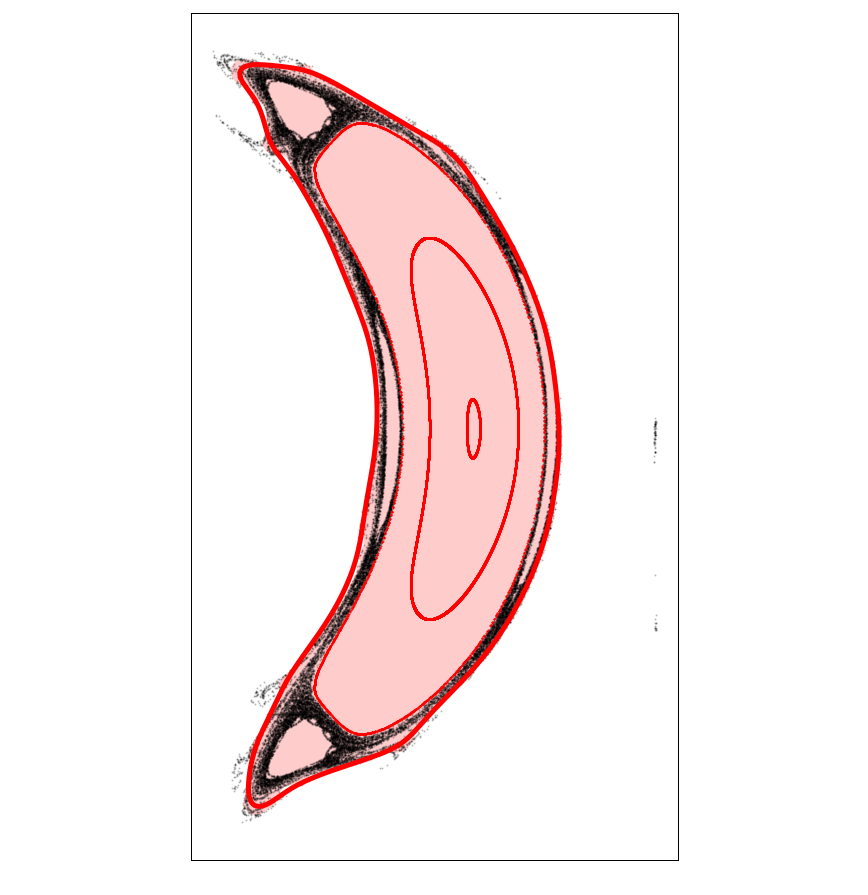

/u/phg/.local/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


Text(0.5, 1.0, '')

In [9]:
precision = 50

plt.close("all")
fig, ax = plt.subplots(figsize=(9.7,10))

ax.add_patch(PolygonPatch(cut_shape, alpha=0.2, color="r", ec="none"))

for i in range(len(out)):
    ax.scatter(out[i,:,0], out[i,:,1], s=2, marker=".", color="k", alpha=0.2)

ax.scatter(gax1[:,0], gax1[:,1], s=1, marker=".", color="r")
#ax.scatter(gax2[:,0], gax2[:,1], s=2, marker=".", color="C0")
ax.scatter(gax3[:,0], gax3[:,1], s=1, marker=".", color="r")
ax.scatter(gax4[:,0], gax4[:,1], s=1, marker=".", color="r")

ax.plot(coords[:,0], coords[:,1], c="r", lw=4)

#alpha_shape = alphashape.alphashape(np.array([r,z]).T, precision)
#ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))

ax.set_aspect("equal")
fig.tight_layout()

ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_title("")

In [11]:
fig.savefig("./images/ftm-outer-fitting.pdf")
fig.savefig("./images/ftm-outer-fitting.pdf", dpi=200)

In [230]:
fig.savefig("/u/phg/temp/3c.pdf")

In [231]:
fig.savefig("/u/phg/temp/3c.png", dpi=200)

<IPython.core.display.Javascript object>


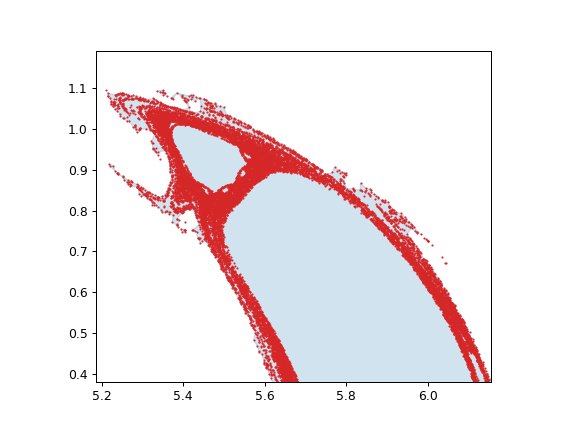

/u/phg/.local/lib/python3.7/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/u/phg/.local/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


In [12]:
fig2, ax2 = plt.subplots()
ax2.add_patch(PolygonPatch(alpha_shape, alpha=0.2, color="C0"))
for i in range(len(out)):
    ax2.scatter(out[i,:,0], out[i,:,1], s=2, marker=".", color="C3")
ax2.set_aspect("equal")

In [170]:
ax.clear()

<IPython.core.display.Javascript object>


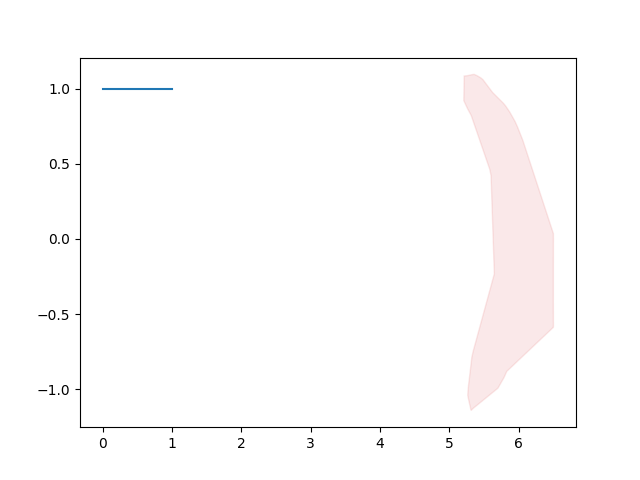

In [168]:

ax2.plot([1,1])

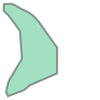

In [163]:
alpha_shape